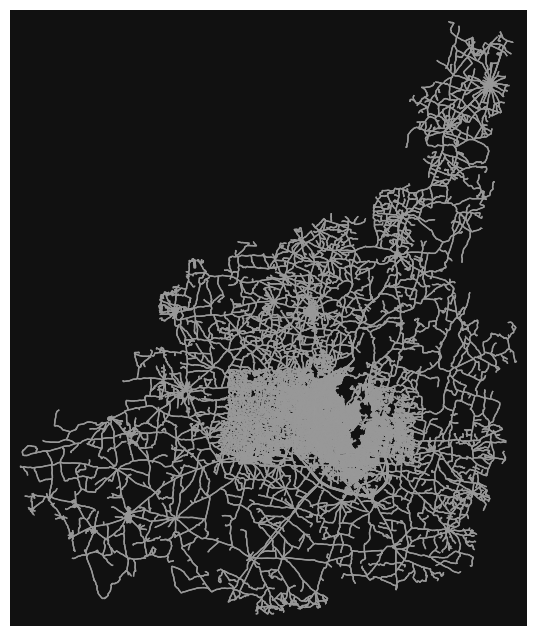

In [6]:
import osmnx as ox
import numpy as np
import matplotlib.pyplot as plt

# Download the OSM road network data
G = ox.graph_from_place("Jaipur")
# Convert the road network to a binary image
fig, ax = ox.plot_graph(G, show=True, close=True, node_size=0)
img = np.array(fig.canvas.renderer._renderer)
img_gray = img.mean(axis=2)
img_binary = img_gray > 100

# Apply the box counting method
box_sizes = range(1, 150)
box_counts = []
road_counts = []
boxes_cover = []

for box_size in box_sizes:
    count_boxes = 0
    count_roads = 0
    count_cover = 0
    for i in range(0, img_binary.shape[0], box_size):
        for j in range(0, img_binary.shape[1], box_size):
            count_boxes += 1
            if img_binary[i:i+box_size, j:j+box_size].any():
                count_roads += 1
                count_cover += 1
            else:
                count_cover += 0
    box_counts.append(count_boxes)
    road_counts.append(count_roads)
    boxes_cover.append(count_cover)




In [7]:
import osmnx as ox

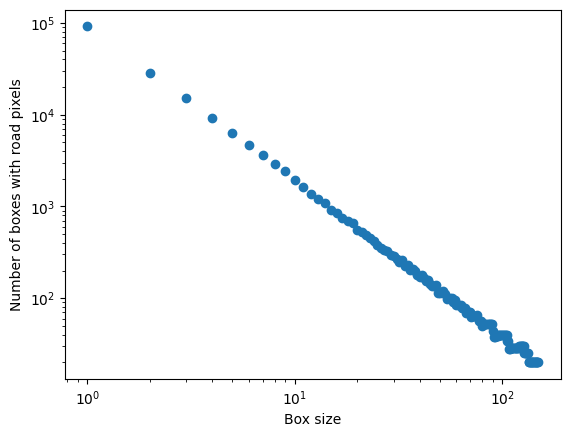

The fractal dimension of the road network is: 1.6995517480255242
The total number of boxes is: 20
Box size: 1, number of boxes: 340896,number of boxes covered:91781
Box size: 2, number of boxes: 85224,number of boxes covered:28676
Box size: 3, number of boxes: 37948,number of boxes covered:15101
Box size: 4, number of boxes: 21306,number of boxes covered:9306
Box size: 5, number of boxes: 13824,number of boxes covered:6380
Box size: 6, number of boxes: 9540,number of boxes covered:4709
Box size: 7, number of boxes: 7007,number of boxes covered:3608
Box size: 8, number of boxes: 5360,number of boxes covered:2908
Box size: 9, number of boxes: 4260,number of boxes covered:2407
Box size: 10, number of boxes: 3456,number of boxes covered:1921
Box size: 11, number of boxes: 2842,number of boxes covered:1629
Box size: 12, number of boxes: 2385,number of boxes covered:1364
Box size: 13, number of boxes: 2058,number of boxes covered:1194
Box size: 14, number of boxes: 1794,number of boxes cover

In [8]:
# Calculate the fractal dimension
slope, intercept = np.polyfit(np.log(box_sizes), np.log(boxes_cover), 1)
fractal_dimension = -slope
# Plot the results
fig, ax = plt.subplots()
ax.scatter(box_sizes, boxes_cover)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Box size')
ax.set_ylabel('Number of boxes with road pixels')
plt.show()

print(f"The fractal dimension of the road network is: {fractal_dimension}")
print(f"The total number of boxes is: {count_boxes}")
for i in range(len(box_sizes)):
    print(f"Box size: {box_sizes[i]}, number of boxes: {box_counts[i]},number of boxes covered:{boxes_cover[i]}")



In [9]:
import osmnx as ox
import numpy as np
import matplotlib.pyplot as plt

In [10]:
G = ox.graph_from_place("Shopian")

In [11]:
b=ox.bearing.add_edge_bearings(G, precision=1)

In [12]:
import networkx as nx
DB = nx.DiGraph(G)

# convert the directed graph to an undirected graph
UB = DB.to_undirected()

In [13]:
ox.bearing.orientation_entropy(UB, num_bins=36, min_length=0, weight=None)

3.489624615763872

In [14]:
pip install scipy

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import scipy

In [16]:
ox.bearing.orientation_entropy(UB, num_bins=36, min_length=0, weight="length")

3.4573794554418105

(<Figure size 500x500 with 1 Axes>, <PolarAxes: title={'center': 'Jaipur'}>)

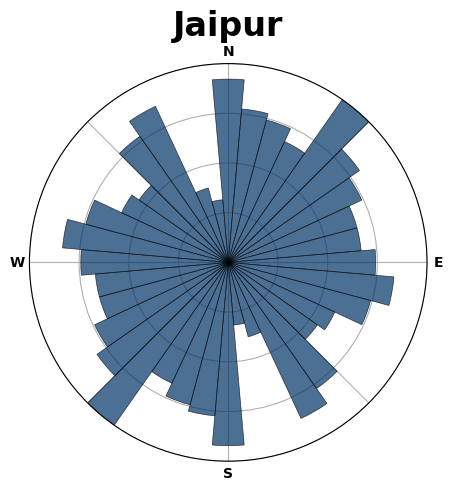

In [17]:
ox.bearing.plot_orientation(UB, num_bins=36, min_length=0, weight=None, ax=None, figsize=(5, 5), area=True, color='#003366', edgecolor='k', linewidth=0.5, alpha=0.7, title="Jaipur", title_y=1.05, title_font=None, xtick_font=None)

In [18]:
stats = ox.basic_stats(G)
extended_stats = ox.extended_stats(G, ecc=True, bc=True, cc=True)
for key, value in extended_stats.items():
    stats[key] = value
pd.Series(stats)

AttributeError: module 'osmnx' has no attribute 'extended_stats'